In [1]:
import pickle
with open('./data.pkl','rb') as file:
    train = pickle.load(file)
train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_weekday,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,2018,1,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,2016,1,5,3
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,2016,1,5,1
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,2016,1,4,21
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,2016,1,4,20


In [2]:
import numpy as np
# 定义label
train['fraud'] = np.where(
    train['Order Status']=='SUSPECTED_FRAUD',1,0
)
train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_weekday,order_hour,fraud
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class,2018,1,2,22,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class,2018,1,5,12,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class,2018,1,5,12,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class,2018,1,5,11,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class,2016,1,5,3,0
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class,2016,1,5,1,0
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class,2016,1,4,21,0
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class,2016,1,4,20,0


In [3]:
train['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

In [4]:
# 特征筛选object特征
cat_cols = train.select_dtypes(include='O')

In [5]:
import pandas as pd
# 日期格式转换
train['shipping date (DateOrders)'] = pd.to_datetime(train['shipping date (DateOrders)'])
cat_cols

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Pacific Asia,Shanghái,China,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Pacific Asia,Hirakata,Japón,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [6]:
# 查看特征唯一值个数
for col in cat_cols:
    num = train[col].nunique()
    if num == 1:
        print(col,num,'================')
    else:
        print(col,num)

Type 4
Delivery Status 4
Category Name 50
Customer City 563
Customer Country 2
Customer Email 1 ================
Customer Fname 782
Customer Lname 1109
Customer Password 1 ================
Customer Segment 3
Customer State 46
Customer Street 7458
Department Name 11
Market 5
Order City 3597
Order Country 164
Order Region 23
Order State 1089
Order Status 9
Product Image 118
Product Name 118
shipping date (DateOrders) 63701
Shipping Mode 4


In [7]:
# 删除唯一特征
train.drop(['Customer Email','Customer Password'],axis=1,inplace=True)

In [8]:
# 哪个产品被欺诈的数量最多
train[train['fraud']==1]['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 560
Nike Men's CJ Elite 2 TD Football Cleat          516
Nike Men's Dri-FIT Victory Golf Polo             481
O'Brien Men's Neoprene Life Vest                 439
Field & Stream Sportsman 16 Gun Fire Safe        394
                                                ... 
TaylorMade 2014 Purelite Stand Bag                 1
Merrell Women's Grassbow Sport Waterproof Hik      1
Merrell Men's All Out Flash Trail Running Sho      1
TaylorMade Women's RBZ SL Rescue                   1
Nike Men's Fingertrap Max Training Shoe            1
Name: Product Name, Length: 105, dtype: int64

In [9]:
# 构造客户姓名
train['Customer full name'] = train['Customer Fname'] + train['Customer Lname']
train[train['fraud']==1]['Customer full name'].value_counts()

MarySmith        528
RobertSmith       28
JamesSmith        23
DavidSmith        20
JonathanSmith     18
                ... 
LeilaJoyner        1
DavidNorris        1
SopolineRush       1
BerthaGarcia       1
MaryGuerra         1
Name: Customer full name, Length: 1061, dtype: int64

In [10]:
train[train['fraud']==1]['Product Image'].value_counts()

http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck                           560
http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat                  516
http://images.acmesports.sports/Nike+Men%27s+Dri-FIT+Victory+Golf+Polo                     481
http://images.acmesports.sports/O%27Brien+Men%27s+Neoprene+Life+Vest                       439
http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe                394
                                                                                          ... 
http://images.acmesports.sports/TaylorMade+2014+Purelite+Stand+Bag                           1
http://images.acmesports.sports/Merrell+Women%27s+Grassbow+Sport+Waterproof+Hiking+Shoe      1
http://images.acmesports.sports/Merrell+Men%27s+All+Out+Flash+Trail+Running+Shoe             1
http://images.acmesports.sports/TaylorMade+Women%27s+RBZ+SL+Rescue                           1
http://images.acmesports.sports/Nike+Men%27s+Finge

In [11]:
train.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Image',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOr

<AxesSubplot:>

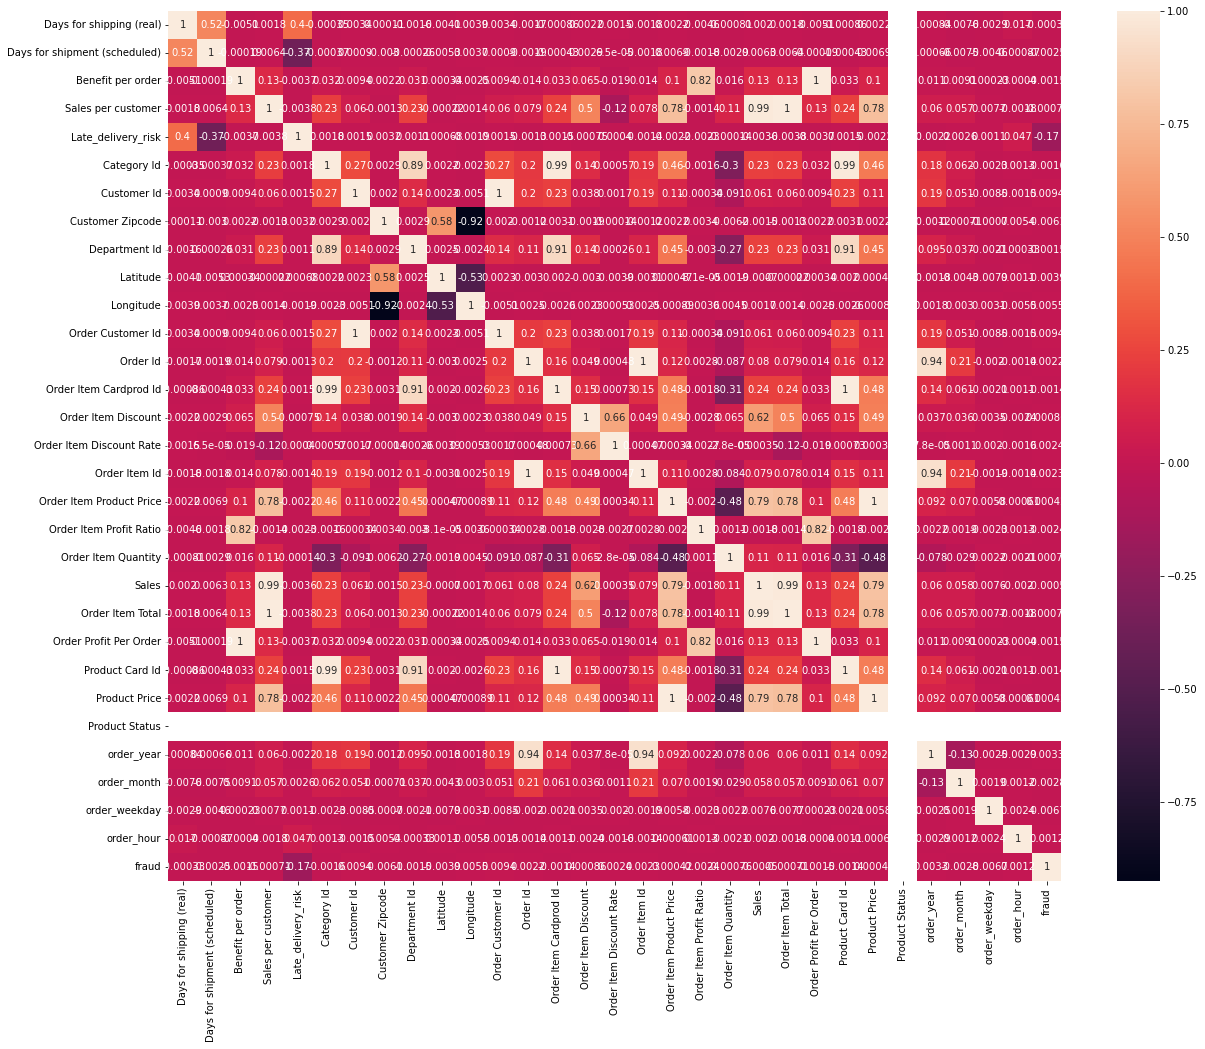

In [12]:
# 通过热力图查看特征之间的相关性，删除无关特征
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(),annot=True) # annotation 标注，将数值标注到图上


In [13]:
'''
    Order Customer Id与Customer Id重复
    Order Item Total与Sales per customer重复
    Order Profit Per Order与Benefit per order重复
    Product Category Id与Category Id重复
    Product Card Id与Order Item Cardprod Id重复
    Product Price与Order Item Product Price重复
    Order Item Id与Order Id重复
    label是Order Status特征生成的，也要删除
'''

'\n    Order Customer Id与Customer Id重复\n    Order Item Total与Sales per customer重复\n    Order Profit Per Order与Benefit per order重复\n    Product Category Id与Category Id重复\n    Product Card Id与Order Item Cardprod Id重复\n    Product Price与Order Item Product Price重复\n    Order Item Id与Order Id重复\n    label是Order Status特征生成的，也要删除\n'

In [14]:
# 删除Order Status,Order Item Total，Order Profit Per Order，Order Item Cardprod Id，Order Item Product Price
train.drop(['Order Status','Order Item Total','Order Profit Per Order','Order Item Cardprod Id','Order Item Product Price','Order Item Id','Order Customer Id'],axis=1,inplace=True)

<AxesSubplot:>

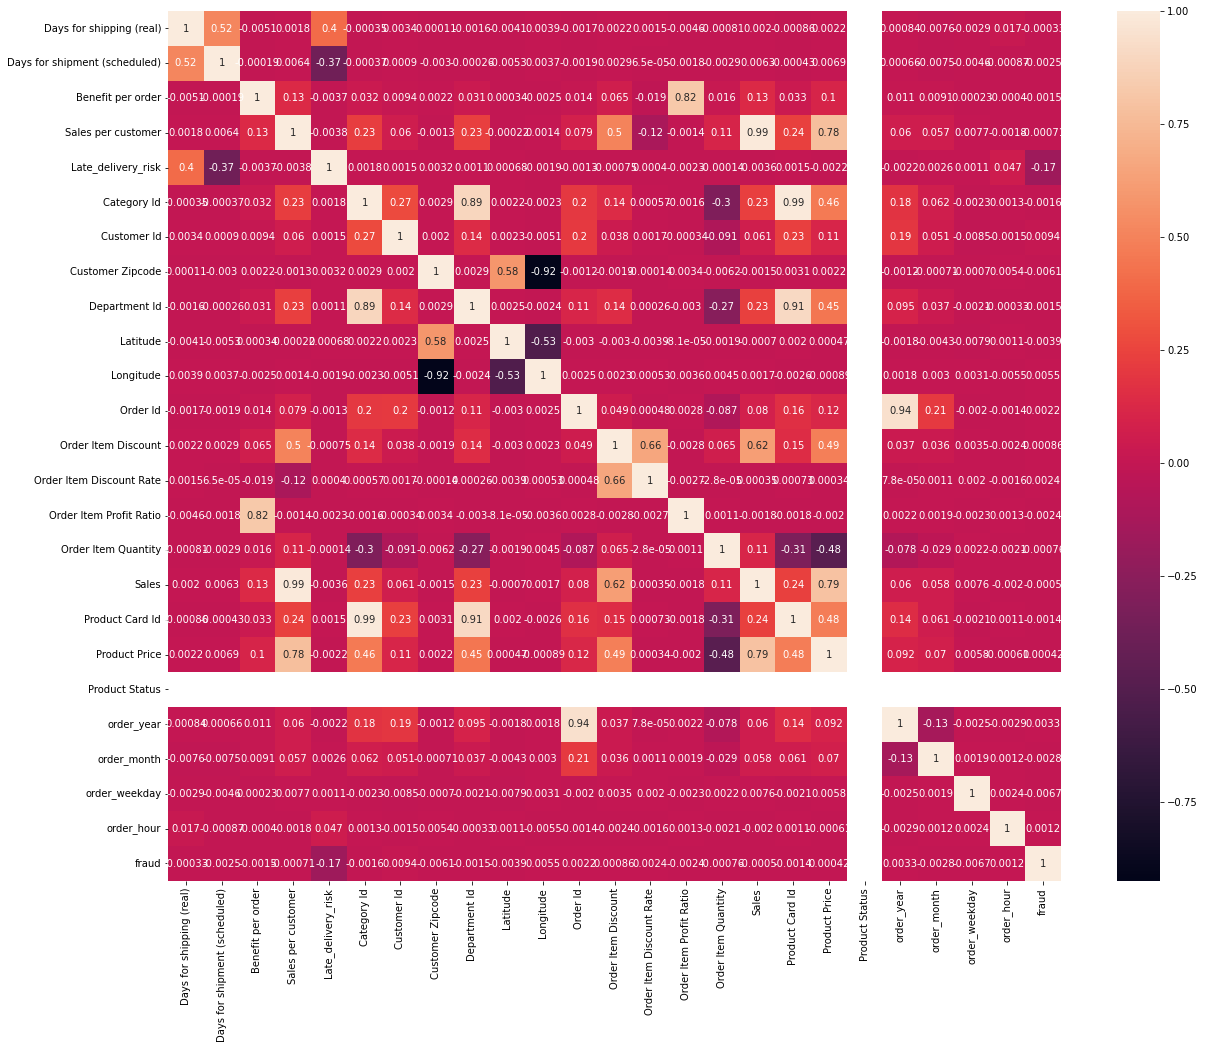

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(),annot=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [17]:
# 时间特征处理,求diff
train['shipping_order_diff']=(train['shipping date (DateOrders)']-train['order date (DateOrders)']).dt.days
train[['order date (DateOrders)','shipping date (DateOrders)','shipping_order_diff']]

,order date (DateOrders),shipping date (DateOrders),shipping_order_diff
0,2018-01-31 22:56:00,2018-02-03 22:56:00,3
1,2018-01-13 12:27:00,2018-01-18 12:27:00,5
2,2018-01-13 12:06:00,2018-01-17 12:06:00,4
3,2018-01-13 11:45:00,2018-01-16 11:45:00,3
4,2018-01-13 11:24:00,2018-01-15 11:24:00,2
...,...,...,...
180514,2016-01-16 03:40:00,2016-01-20 03:40:00,4
180515,2016-01-16 01:34:00,2016-01-19 01:34:00,3
180516,2016-01-15 21:00:00,2016-01-20 21:00:00,5
180517,2016-01-15 20:18:00,2016-01-18 20:18:00,3


In [18]:
# 删除日期类型
train.drop(['shipping date (DateOrders)','order date (DateOrders)'],axis=1,inplace=True)

In [19]:
pd.set_option('max_columns',None)
cat_cols = train.select_dtypes(include='O')
cat_cols

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Image,Product Name,Shipping Mode,Customer full name
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,http://images.acmesports.sports/Smart+watch,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,http://images.acmesports.sports/Smart+watch,Smart watch,Standard Class,IreneLuna
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,http://images.acmesports.sports/Smart+watch,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Tana,Tate,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,http://images.acmesports.sports/Smart+watch,Smart watch,Standard Class,TanaTate
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,http://images.acmesports.sports/Smart+watch,Smart watch,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,Maria,Peterson,Home Office,NY,1322 Broad Glade,Fan Shop,Pacific Asia,Shanghái,China,Eastern Asia,Shanghái,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MariaPeterson
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,Ronald,Clark,Corporate,CA,7330 Broad Apple Moor,Fan Shop,Pacific Asia,Hirakata,Japón,Eastern Asia,Osaka,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,RonaldClark
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,John,Smith,Corporate,CT,97 Burning Landing,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,JohnSmith
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,Mary,Smith,Consumer,PR,2585 Silent Autumn Landing,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MarySmith


In [20]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols.columns:
    #     print(col)
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Card Id,Product Image,Product Name,Product Price,Product Status,Shipping Mode,order_year,order_month,order_weekday,order_hour,fraud,Customer full name,shipping_order_diff
0,1,3,4,91.250000,314.640015,0,0,73,40,66,1,109,20755,482,0,36,3683,725.0,2,4,18.251453,-66.037056,3,331,70,77202,13.110000,0.04,0.29,1,327.750000,15,475,1360,78,78,327.750000,0,3,2018,1,2,22,0,1876,3
1,3,5,4,-249.089996,311.359985,1,1,73,40,66,1,311,19492,615,0,36,1400,725.0,2,4,18.279451,-66.037064,3,391,69,75939,16.389999,0.05,-0.80,1,327.750000,13,841,1360,78,78,327.750000,0,3,2018,1,5,12,0,5378,5
2,0,4,4,-247.779999,309.720001,3,0,73,40,452,0,249,19491,626,0,5,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,75938,18.030001,0.06,-0.80,1,327.750000,13,841,1360,78,78,327.750000,0,3,2018,1,5,12,0,4429,4
3,1,3,4,22.860001,304.809998,0,0,73,40,285,0,707,19490,989,2,5,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,75937,22.940001,0.07,0.08,1,327.750000,11,835,1360,78,78,327.750000,0,3,2018,1,5,11,0,12929,3
4,2,2,4,134.210007,298.250000,0,0,73,40,66,1,570,19489,454,1,36,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,75936,29.500000,0.09,0.45,1,327.750000,11,835,1360,78,78,327.750000,0,3,2018,1,5,11,0,10638,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,399.980011,3,0,45,18,59,0,489,1005,805,2,31,285,11207.0,7,3,40.640930,-73.942711,3,2922,31,26043,0.000000,0.00,0.10,1,399.980011,7,913,1004,24,24,399.980011,0,3,2016,1,5,3,0,8426,4
180515,1,3,2,-613.770019,395.980011,1,1,45,18,26,0,635,9141,195,1,5,5261,93304.0,7,3,35.362545,-119.018700,3,1362,77,26037,4.000000,0.01,-1.55,1,399.980011,7,770,1004,24,24,399.980011,0,2,2016,1,5,1,0,11679,3
180516,3,5,4,141.110001,391.980011,1,1,45,18,55,0,359,291,948,1,7,7208,6010.0,7,3,41.629959,-72.967155,3,25,8,26024,8.000000,0.02,0.36,1,399.980011,11,88,1004,24,24,399.980011,0,3,2016,1,4,21,0,6300,5
180517,2,3,4,186.229996,387.980011,0,0,45,18,66,1,500,2813,948,0,36,1335,725.0,7,3,18.213350,-66.370575,3,25,8,26022,12.000000,0.03,0.48,1,399.980011,11,88,1004,24,24,399.980011,0,3,2016,1,4,20,0,9384,3


In [21]:
train.to_pickle('./train.pkl')

# 模型训练

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import OneClassSVM,SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,IsolationForest
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,KBinsDiscretizer
from sklearn.metrics import mean_absolute_error,accuracy_score,recall_score,f1_score,confusion_matrix,precision_score
import warnings
warnings.filterwarnings('ignore')
# 对fraud,欺诈风险进行预测（分类预测）
X_train = train.drop(['fraud'],axis=1)
Y_train = train['fraud']
# 0-1归一化
mm = MinMaxScaler()
X_train.loc[:] = mm.fit_transform(X_train)

x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test = train_test_split(X_train,Y_train,test_size=0.16,random_state=7)

In [23]:
X_train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Product Card Id,Product Image,Product Name,Product Price,Product Status,Shipping Mode,order_year,order_month,order_weekday,order_hour,Customer full name,shipping_order_diff
0,0.333333,0.500000,1.0,0.841800,0.158939,0.000000,0.0,0.959459,0.816327,0.117438,1.0,0.139565,0.999904,0.435018,0.0,0.800000,0.493898,0.001237,0.0,0.4,0.630916,0.336599,0.75,0.092047,0.429448,0.999974,0.02622,0.16,0.935385,0.0,0.159678,0.681818,0.436581,0.997768,0.666667,0.666667,0.159678,0.0,1.000000,1.000000,0.0,0.333333,0.956522,0.133694,0.500000
1,1.000000,0.833333,1.0,0.776183,0.157242,0.333333,1.0,0.959459,0.816327,0.117438,1.0,0.398207,0.939054,0.555054,0.0,0.800000,0.187743,0.001237,0.0,0.4,0.631254,0.336599,0.75,0.108732,0.423313,0.983615,0.03278,0.20,0.600000,0.0,0.159678,0.590909,0.772978,0.997768,0.666667,0.666667,0.159678,0.0,1.000000,1.000000,0.0,0.833333,0.521739,0.383267,0.833333
2,0.000000,0.666667,1.0,0.776435,0.156393,1.000000,0.0,0.959459,0.816327,0.804270,0.0,0.318822,0.939006,0.564982,0.0,0.111111,0.833713,0.958622,0.0,0.4,0.861100,0.132258,0.75,0.108732,0.423313,0.983602,0.03606,0.24,0.600000,0.0,0.159678,0.590909,0.772978,0.997768,0.666667,0.666667,0.159678,0.0,1.000000,1.000000,0.0,0.833333,0.521739,0.315636,0.666667
3,0.333333,0.500000,1.0,0.828614,0.153853,0.000000,0.0,0.959459,0.816327,0.507117,0.0,0.905250,0.938957,0.892599,1.0,0.111111,0.241786,0.906919,0.0,0.4,0.822823,0.145395,0.75,0.897108,0.049080,0.983589,0.04588,0.28,0.870769,0.0,0.159678,0.500000,0.767463,0.997768,0.666667,0.666667,0.159678,0.0,1.000000,1.000000,0.0,0.833333,0.478261,0.921394,0.500000
4,0.666667,0.333333,1.0,0.850082,0.150458,0.000000,0.0,0.959459,0.816327,0.117438,1.0,0.729834,0.938909,0.409747,0.5,0.800000,0.850878,0.001237,0.0,0.4,0.630944,0.336599,0.75,0.897108,0.049080,0.983576,0.05900,0.36,0.984615,0.0,0.159678,0.500000,0.767463,0.997768,0.666667,0.666667,0.159678,0.0,1.000000,1.000000,0.0,0.833333,0.478261,0.758124,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0.000000,0.666667,1.0,0.831919,0.203100,1.000000,0.0,0.581081,0.367347,0.104982,0.0,0.626120,0.048372,0.726534,1.0,0.688889,0.038219,0.107543,0.5,0.3,0.901583,0.307672,0.75,0.812570,0.190184,0.337318,0.00000,0.00,0.876923,0.0,0.195975,0.318182,0.839154,0.732887,0.205128,0.205128,0.195975,0.0,1.000000,0.333333,0.0,0.833333,0.130435,0.600485,0.666667
180515,0.333333,0.500000,0.5,0.705873,0.201030,0.333333,1.0,0.581081,0.367347,0.046263,0.0,0.813060,0.440355,0.175993,0.5,0.111111,0.705512,0.940153,0.5,0.3,0.837772,0.142733,0.75,0.378754,0.472393,0.337241,0.00800,0.04,0.369231,0.0,0.195975,0.318182,0.707721,0.732887,0.205128,0.205128,0.195975,0.0,0.666667,0.333333,0.0,0.833333,0.043478,0.832312,0.500000
180516,1.000000,0.833333,1.0,0.851413,0.198960,0.333333,1.0,0.581081,0.367347,0.097865,0.0,0.459667,0.013972,0.855596,0.5,0.155556,0.966609,0.054837,0.5,0.3,0.913539,0.311241,0.75,0.006952,0.049080,0.337072,0.01600,0.08,0.956923,0.0,0.195975,0.500000,0.080882,0.732887,0.205128,0.205128,0.195975,0.0,1.000000,0.333333,0.0,0.666667,0.913043,0.448974,0.833333
180517,0.666667,0.500000,1.0,0.860112,0.196890,0.000000,0.0,0.581081,0.367347,0.117438,1.0,0.640205,0.135479,0.855596,0.0,0.800000,0.179026,0.001237,0.5,0.3,0.630455,0.335379,0.75,0.006952,0.049080,0.337046,0.02400,0.12,0.993846,0.0,0.195975,0.500000,0.080882,0.732887,0.205128,0.205128,0.195975,0

In [24]:
Y_train

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: fraud, Length: 180519, dtype: int32

In [25]:
# 对模型进行训练和评估
def model_stats(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    print('Model:',model)
    print(f'Acc:{accuracy},Recall:{recall},Precision:{precision},F1:{f1}')
    print('Confusion Matrix=\n{0}'.format(confusion))

In [26]:
model_li = [LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),LinearSVC(),KNeighborsClassifier(),LinearDiscriminantAnalysis(),RandomForestClassifier(),XGBClassifier()]

for model in model_li:
    model_stats(model,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test)
    print('================================================================')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Acc:0.9791233901121729,Recall:0.2,Precision:0.5720720720720721,F1:0.29638273045507585
Confusion Matrix=
[[28154    95]
 [  508   127]]
Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Acc:0.9950837834095001,Recall:0.9039370078740158,Precision:0.8763358778625954,F1:0.889922480620154

In [27]:
# 缺失值填充方案
# 模型预测（不一定好）
# 类别特征用众数填充
# 连续特征用ffill，bfill向前向后填充

In [32]:
# 对Late_delivery_risk,延期交货风险进行预测
X= train.drop(['Late_delivery_risk','Delivery Status'],axis=1)
Y= train['Late_delivery_risk']
# 0-1归一化
mm = MinMaxScaler()
X.loc[:] = mm.fit_transform(X)

x_delivery_train,x_delivery_test,y_delivery_train,y_delivery_test = train_test_split(X,Y,test_size=0.2,random_state=16)

In [33]:
model_li = [LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),LinearSVC(),KNeighborsClassifier(),LinearDiscriminantAnalysis(),RandomForestClassifier(),XGBClassifier()]

for model in model_li:
    model_stats(model,x_delivery_train,x_delivery_test,y_delivery_train,y_delivery_test)
    print('================================================================')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Acc:0.9883946377132727,Recall:1.0,Precision:0.9792707663384951,F1:0.9895268328042593
Confusion Matrix=
[[15891   419]
 [    0 19794]]
Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Acc:0.9939895856414802,Recall:0.9938870364756998,Precision:0.9951439121857454,F1:0.9945150772186134

In [41]:
#销售额预测（回归任务）
from sklearn.svm import OneClassSVM,SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,IsolationForest
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,ARDRegression,BayesianRidge,SGDRegressor,RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
'''
    如果数据来源相同，说明这两个字段是一回事
    如果数据来源不同，说明一个字段对另一个字段很有帮助
'''

'\n    如果数据来源相同，说明这两个字段是一回事\n    如果数据来源不同，说明一个字段对另一个字段很有帮助\n'

In [45]:
# 预测Sales字段，去掉sales per customer
X_sales= train.drop(['Sales','Sales per customer'],axis=1)
Y_sales= train['Sales']
# 0-1归一化
mm = MinMaxScaler()
X_sales.loc[:] = mm.fit_transform(X_sales)

x_sales_train,x_sales_test,y_sales_train,y_sales_test = train_test_split(X_sales,Y_sales,test_size=0.16,random_state=8)

In [42]:
# 对回归任务进行训练和评估
def model_reg(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print('Model:',model)
    print(f'MAE:{mae},MSE:{mse},R2:{r2}')

In [47]:
model_li = [LinearRegression(),Lasso(), Ridge(),ElasticNet(),BayesianRidge(),SGDRegressor(),RANSACRegressor(),DecisionTreeRegressor(),LGBMRegressor()]

for model in model_li:
    model_reg(model,x_sales_train,x_sales_test,y_sales_train,y_sales_test)
    print('================================================================')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE:18.358992192190193,MSE:942.8629500282365,R2:0.9460603187050852
Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE:22.70616153668295,MSE:1560.4548034232841,R2:0.9107288765888508
Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE:18.355007798148804,MSE:943.375819469983,R2:0.9460309782646396
Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE:88.64480398344911,MSE:15543.598068326724,R2:0.11077561595066543
Model: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,


In [48]:
# 预测订货数量
X_order= train.drop(['Order Item Quantity'],axis=1)
Y_order= train['Order Item Quantity']
# 0-1归一化
mm = MinMaxScaler()
X_order.loc[:] = mm.fit_transform(X_order)

x_order_train,x_order_test,y_order_train,y_order_test = train_test_split(X_order,Y_order,test_size=0.25,random_state=8)

In [51]:
model_li = [LinearRegression(),Lasso(), Ridge(),ElasticNet(),BayesianRidge(),SGDRegressor(),DecisionTreeRegressor(),LGBMRegressor()]

for model in model_li:
    model_reg(model,x_order_train,x_order_test,y_order_train,y_order_test)
    print('================================================================')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE:0.3462204652454695,MSE:0.28638786474308814,R2:0.865562950598897
Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
MAE:1.2712478925302761,MSE:2.1303738111762245,R2:-4.6456412662765345e-05
Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
MAE:0.3479576506365883,MSE:0.2866831257198242,R2:0.8654243483066829
Model: ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
MAE:1.2712478925302761,MSE:2.1303738111762245,R2:-4.6456412662765345e-05
Model: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alp